In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import numpy as np

# Import data
data = pd.read_csv("CS839_ HCI.csv")
data = pd.concat([data]*4, ignore_index=True)

data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(['Name'], axis=1)
data.to_csv("Data.csv")

len(data)

60

In [2]:
for i in range(len(data.columns.values)):
    print (i, data.columns.values[i])

0 Timestamp
1 By clicking the button below, you acknowledge that you are participating in this study voluntarily and that you may choose to withdraw at any time.
Please be assured that your responses will be kept completely confidential.
2 Name
3 Age
4 Gender
5 …is reserved.
6 …is generally trusting.
7 ...tends to be lazy.
8 …is relaxed, handles stress well.
9 …has few artistic interests.
10 …is outgoing, sociable.
11 …tends to find fault with others.
12 …does a thorough job.
13 …gets nervous easily.
14 …has an active imagination.
15 Do you feel bad about your eating choices after watching this ad?
16 Read the following reviews - 

"I used to turn to food whenever I felt stressed or anxious, but I've come to realize that emotional snacking is not a sustainable solution. Not only does it deprive my body of the nutrients it needs, but it also causes long-term damage to my health."
"As someone who is passionate about nutrition, I can confidently say that emotional snacking is an unhealthy

In [3]:
data.columns.values[15] = "pre_q1"
data.columns.values[16] = "post_q1"
data.columns.values[17] = "pre_q2"
data.columns.values[18] = "post_q2"
data.columns.values[19] = "pre_q3"
data.columns.values[20] = "post_q3"
data.columns.values[21] = "pre_q4"
data.columns.values[22] = "post_q4"
data.columns.values[23] = "pre_q5"
data.columns.values[24] = "post_q5"
data.columns.values[25] = "pre_q6"
data.columns.values[26] = "post_q6"

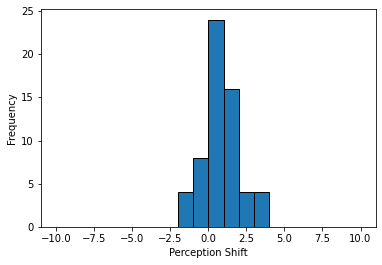

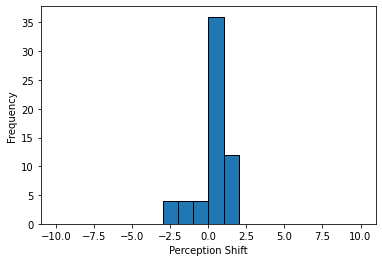

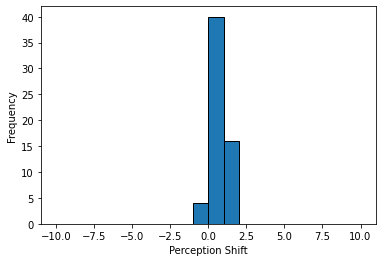

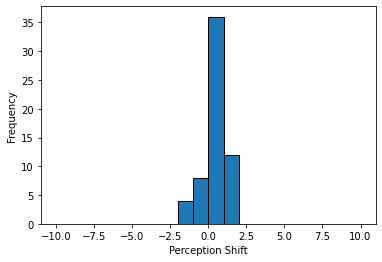

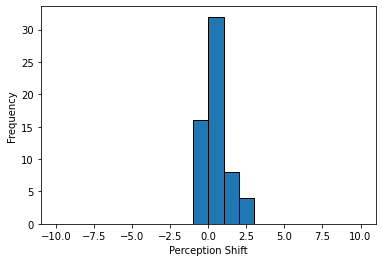

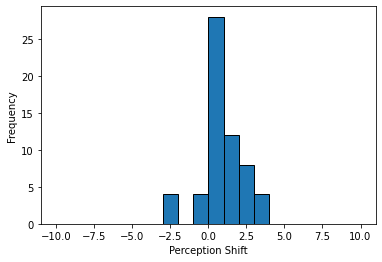

<Figure size 432x288 with 0 Axes>

In [43]:
#q1
# Compute shift for each question
for i in range(1, 7):
    pre_col = f"pre_q{i}"
    post_col = f"post_q{i}"
    shift_col = f"shift_q{i}"
    data[shift_col] = data[post_col] - data[pre_col]

# Create histogram of shifts for question 1
plt.hist(data["shift_q1"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Perception Shift")
plt.ylabel("Frequency")
plt.show()

plt.savefig("rq1_q1.png")




# Create histogram of shifts for question 1
plt.hist(data["shift_q2"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Perception Shift")
plt.ylabel("Frequency")
plt.show()


plt.savefig("rq1_q2.png")
# Create histogram of shifts for question 1
plt.hist(data["shift_q3"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Perception Shift")
plt.ylabel("Frequency")
plt.show()
plt.savefig("rq1_q3.png")

# Create histogram of shifts for question 1
plt.hist(data["shift_q4"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Perception Shift")
plt.ylabel("Frequency")
plt.show()
plt.savefig("rq1_q4.png")
# Create histogram of shifts for question 1
plt.hist(data["shift_q5"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Perception Shift")
plt.ylabel("Frequency")
plt.show()
plt.savefig("rq1_q5.png")
# Create histogram of shifts for question 1
plt.hist(data["shift_q6"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Perception Shift")
plt.ylabel("Frequency")
plt.show()
plt.savefig("rq1_q6.png")

In [5]:
# Conduct one-sample t-test for each question
for i in range(1, 7):
    t_stat, p_value = ttest_1samp(data[f"shift_q{i}"], popmean=0)
    print("question %d, t = %.3f, p = %.3f" % (i, t_stat, p_value))

question 1, t = 2.147, p = 0.036
question 2, t = -1.469, p = 0.147
question 3, t = 2.836, p = 0.006
question 4, t = -0.664, p = 0.510
question 5, t = 0.000, p = 1.000
question 6, t = 2.265, p = 0.027


In [6]:
# The t-value of 1.826 represents the difference between the mean shift in participants' responses after reading the reviews and the hypothesized mean shift of 0. The positive t-value indicates that the mean shift is greater than 0.

# The p-value of 0.142 is the probability of observing a t-value as large as 1.826 or larger, assuming that the true mean shift is 0. If the p-value is less than your significance level (usually 0.05), you can reject the null hypothesis (that there is no significant difference between the mean shift and 0) and conclude that the mean shift is significantly different from 0.

# However, since the p-value of 0.142 is greater than the typical significance level of 0.05, we cannot reject the null hypothesis at this significance level. This means that we do not have enough evidence to conclude that the reviews have a significant effect on shifting participants' perceptions of food marketing ads on social media.

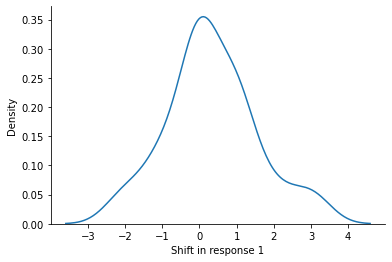

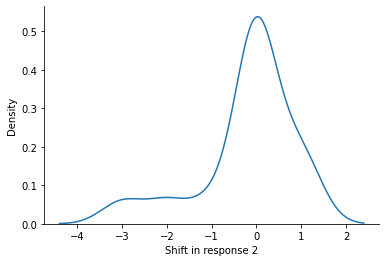

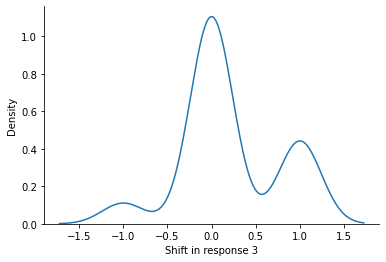

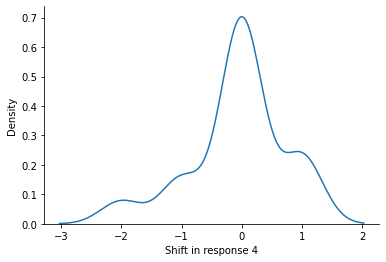

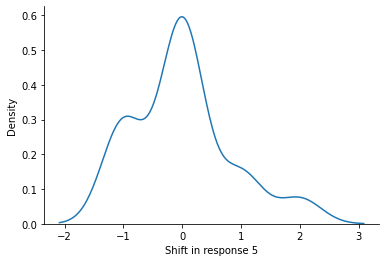

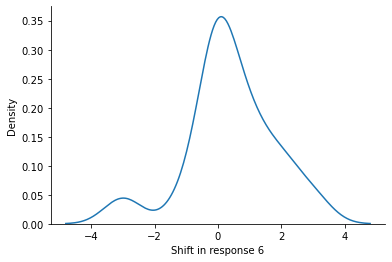

In [7]:
import seaborn as sns

for i in range(1,7):
    sns.kdeplot(data=data, x=f"shift_q{i}")
    sns.despine()
    plt.xlabel(f"Shift in response {i}")
    plt.ylabel("Density")
    plt.show()

In [8]:
#q3
from scipy.stats import ttest_ind, f_oneway
# Conduct t-test and ANOVA for each question
for i in range(1, 7):
    pre_col = f"pre_q{i}"
    post_col = f"post_q{i}"
    male_shifts = data[data["Gender"] == "Male"][post_col] - data[data["Gender"] == "Male"][pre_col]
    female_shifts = data[data["Gender"] == "Female"][post_col] - data[data["Gender"] == "Female"][pre_col]
    t_stat, p_value = ttest_ind(male_shifts, female_shifts, equal_var=False)
    f_stat, p_value2 = f_oneway(male_shifts, female_shifts)
    print(f"Question {i}:")
    print("Welch's t-test: t = %.3f, p = %.3f" % (t_stat, p_value))
    print("One-way ANOVA: F = %.3f, p = %.3f" % (f_stat, p_value2))
    print("")

Question 1:
Welch's t-test: t = 3.977, p = 0.000
One-way ANOVA: F = 15.263, p = 0.000

Question 2:
Welch's t-test: t = 1.373, p = 0.176
One-way ANOVA: F = 1.450, p = 0.233

Question 3:
Welch's t-test: t = -2.309, p = 0.026
One-way ANOVA: F = 5.800, p = 0.019

Question 4:
Welch's t-test: t = 0.583, p = 0.562
One-way ANOVA: F = 0.290, p = 0.592

Question 5:
Welch's t-test: t = -4.818, p = 0.000
One-way ANOVA: F = 19.333, p = 0.000

Question 6:
Welch's t-test: t = 1.071, p = 0.293
One-way ANOVA: F = 1.534, p = 0.221



Female    36
Male      24
Name: Gender, dtype: int64
Male      24
Female    24
Name: Gender, dtype: int64


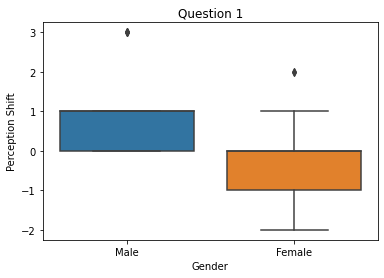

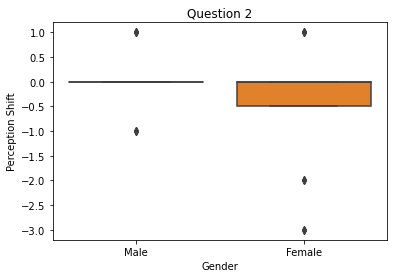

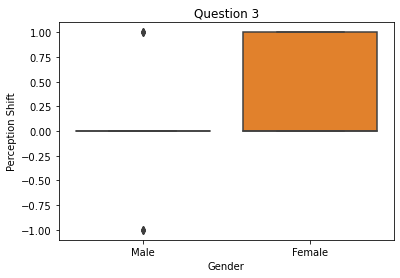

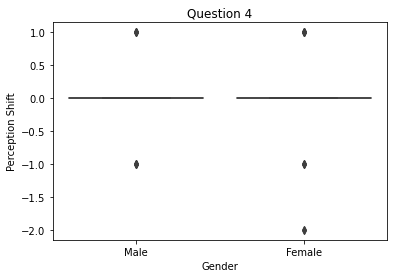

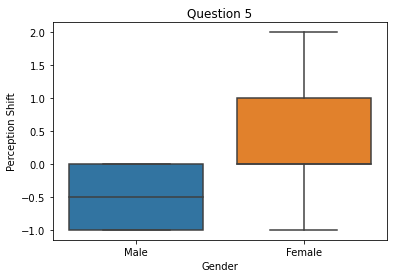

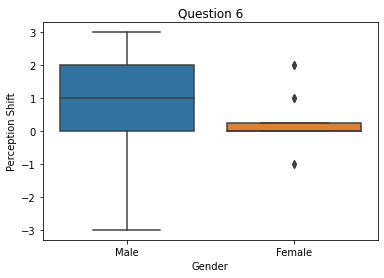

<Figure size 432x288 with 0 Axes>

In [51]:
import seaborn as sns
print(data["Gender"].value_counts())
# Create boxplots for each question

male_df = data[data['Gender'] == 'Male'].head(24)
female_df = data[data['Gender'] == 'Female'].head(24)
new_df = pd.concat([male_df, female_df], ignore_index=True)

print(new_df["Gender"].value_counts())

for i in range(1, 7):
    pre_col = f"pre_q{i}"
    post_col = f"post_q{i}"
    male_shifts = new_df[new_df["Gender"] == "Male"][post_col] - new_df[new_df["Gender"] == "Male"][pre_col]
    female_shifts = new_df[new_df["Gender"] == "Female"][post_col] - new_df[new_df["Gender"] == "Female"][pre_col]
    df = pd.DataFrame({"Gender": ["Male"]*len(male_shifts) + ["Female"]*len(female_shifts),
                       "Perception Shift": list(male_shifts) + list(female_shifts)})
    sns.boxplot(x="Gender", y="Perception Shift", data=df)
    plt.title(f"Question {i}")
    plt.show()
    
    plt.savefig("r3_q"+str(i)+".png")

In [10]:
data = data.rename(columns={'…is reserved.': '1', 
                        '…is generally trusting.': '2', 
                        '...tends to be lazy.': '3',
                        '…is relaxed, handles stress well.': '4',
                        '…has few artistic interests.': '5',
                        '…is outgoing, sociable.': '6',
                        '…tends to find fault with others.': '7',
                        '…does a thorough job.': '8',
                        '…gets nervous easily.': '9',
                        '…has an active imagination.': '10'
                        })

In [11]:
def reverse_score(value):
    if value == 1:
        return 5
    elif value == 2:
        return 4
    elif value == 4:
        return 2
    elif value == 5:
        return 1
    else:
        return 3

In [12]:
data['5R'] = pd.Series(dtype=int)
data['3R'] = pd.Series(dtype=int)
data['1R'] = pd.Series(dtype=int)
data['4R'] = pd.Series(dtype=int)
data['7R'] = pd.Series(dtype=int)

for index, row in data.iterrows():
        data.at[index, '5R'] = reverse_score(row['5'])
        data.at[index, '3R'] = reverse_score(row['3'])
        data.at[index, '1R'] = reverse_score(row['1'])
        data.at[index, '4R'] = reverse_score(row['4'])
        data.at[index, '7R'] = reverse_score(row['7'])


data['O'] = pd.Series(dtype=float)
data['C'] = pd.Series(dtype=float)
data['E'] = pd.Series(dtype=float)
data['A'] = pd.Series(dtype=float)
data['N'] = pd.Series(dtype=float)
for index, row in data.iterrows():
        data.at[index, 'O'] = (row['5R'] + row['10'])/2.0
        data.at[index, 'C'] = (row['3R'] + row['8'])/2.0
        data.at[index, 'E'] = (row['1R'] + row['6'])/2.0
        data.at[index, 'A'] = (row['2'] + row['7R'])/2.0
        data.at[index, 'N'] = (row['4R'] + row['9'])/2.0


In [13]:
#def get_dominant_personality(row):
    # create a dictionary mapping column names to trait scores
#    trait_scores = dict(zip(['O', 'C', 'E', 'A', 'N'], row[['O', 'C', 'E', 'A', 'N']].values))
    # sort the traits in descending order of score
#    sorted_traits = sorted(trait_scores.items(), key=lambda x: x[1], reverse=True)
    # extract the names of the highest-scoring traits
#    dominant_traits = [trait_name for trait_name, trait_score in sorted_traits if trait_score == sorted_traits[0][1]]
#    dominant_personalities = [trait_name for trait_name, trait_score in sorted_traits if trait_name in dominant_traits]
#    return ', '.join(dominant_personalities)

In [14]:
def get_dominant_personality(row):
    # create a dictionary mapping column names to trait scores
    trait_scores = dict(zip(['O', 'C', 'E', 'A', 'N'], row[['O', 'C', 'E', 'A', 'N']].values))
    # find the highest-scoring trait
    dominant_trait = max(trait_scores, key=trait_scores.get)
    return dominant_trait

In [15]:
data['DominantPersonality'] = data.apply(get_dominant_personality, axis=1)
data.head(15)

Timestamp  \
0    2023/04/19 1:40:57 PM EST   
1    2023/04/19 9:12:25 PM EST   
2    2023/04/19 9:32:13 PM EST   
3    2023/04/19 9:43:16 PM EST   
4   2023/04/19 10:36:19 PM EST   
5   2023/04/19 11:22:49 PM EST   
6   2023/04/20 12:04:00 AM EST   
7    2023/04/20 2:14:11 AM EST   
8    2023/04/20 8:30:44 AM EST   
9    2023/04/20 1:33:18 PM EST   
10   2023/04/20 3:37:37 PM EST   
11   2023/04/21 4:01:09 PM EST   
12   2023/04/24 3:57:38 PM EST   
13  2023/04/24 10:10:55 PM EST   
14   2023/04/25 3:25:14 PM EST   

   By clicking the button below, you acknowledge that you are participating in this study voluntarily and that you may choose to withdraw at any time.\nPlease be assured that your responses will be kept completely confidential.  \
0                            I consent to participate                                                                                                                                                                                 
1                            I consent to participate                                                                                                                                                                                 
2                            I consent to participate                                                                                                                                                                                 
3                            I consent to participate                                                                                                                                                                                 
4                            I consent to participate                                                                                                                                                                                 
5                            I consent to participate                                                                                                                                                                                 
6                            I consent to participate                                                                                                                                                                                 
7                            I consent to participate                                                                                                                                                                                 
8                            I consent to participate                                                                                                                                                                                 
9                            I consent to participate                                                                                                                                                                                 
10                           I consent to participate                                                                                                                                                                                 
11                           I consent to participate                                                                                                                                                                                 
12                           I consent to participate                                                                                                                                                                                 
13                           I consent to participate                                                                                                                                                                                 
14         

In [16]:
traits = ['O', 'C', 'E', 'A', 'N']

# Count the number of participants for each trait in the 'DominantPersonality' column
counts = []
for trait in traits:
    count = data['DominantPersonality'].str.contains(trait).sum()
    counts.append(count)
min_count = np.min(counts)

In [17]:
print(counts)
print(min_count)

[16, 8, 12, 12, 12]
8


In [18]:
def encode_values(value):
    if value > 0:
        return 1
    elif value < 0:
        return -1
    else:
        return 0


In [19]:

# determine the number of participants to keep for each trait
num_participants_per_trait = 8

# use a list comprehension to filter out an equal number of participants for each trait
filtered_data = pd.concat([data[data['DominantPersonality'] == trait].head(num_participants_per_trait) for trait in set(data['DominantPersonality'])])

# print the resulting DataFrame
#print(filtered_data)

#filtered_data.head()

filtered_data.columns



Index(['Timestamp',
       'By clicking the button below, you acknowledge that you are participating in this study voluntarily and that you may choose to withdraw at any time.\nPlease be assured that your responses will be kept completely confidential.',
       'Name', 'Age', 'Gender', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', 'pre_q1', 'post_q1', 'pre_q2', 'post_q2', 'pre_q3', 'post_q3',
       'pre_q4', 'post_q4', 'pre_q5', 'post_q5', 'pre_q6', 'post_q6',
       'Please describe why you think reading reviews can influence or persuade you to try out food-related products or recipes.',
       'shift_q1', 'shift_q2', 'shift_q3', 'shift_q4', 'shift_q5', 'shift_q6',
       '5R', '3R', '1R', '4R', '7R', 'O', 'C', 'E', 'A', 'N',
       'DominantPersonality'],
      dtype='object')

In [22]:
from scipy.stats import pearsonr
corr_df = pd.DataFrame(columns=['Trait', 'Correlation', 'P-value'])
questions = ['shift_q1', 'shift_q2', 'shift_q3', 'shift_q4', 'shift_q5', 'shift_q6']
traits = ['E', 'O', 'C', 'A', 'N']
for question in questions:
    for trait in traits:
        corr, p_val = pearsonr(filtered_data[trait], filtered_data[question])
        corr_df = corr_df.append({'Question': question, 'Trait': trait, 'Correlation': corr, 'P-value': p_val}, ignore_index=True)

print(corr_df)
#0 - E  5 - E 19 - N 24 - N


   Trait Correlation   P-value  Question
0      E    0.325312  0.040531  shift_q1
1      O   -0.386395  0.013787  shift_q1
2      C    0.035512  0.827786  shift_q1
3      A    0.058051  0.721987  shift_q1
4      N   -0.335033   0.03458  shift_q1
5      E    0.431758  0.005404  shift_q2
6      O    -0.04355  0.789601  shift_q2
7      C    0.176474  0.276021  shift_q2
8      A   -0.143856  0.375836  shift_q2
9      N   -0.192781  0.233334  shift_q2
10     E    0.050517  0.756892  shift_q3
11     O    0.033331  0.838217  shift_q3
12     C    -0.28363  0.076134  shift_q3
13     A   -0.558588   0.00018  shift_q3
14     N    0.250569  0.118883  shift_q3
15     E   -0.091559  0.574193  shift_q4
16     O    0.150287  0.354638  shift_q4
17     C    0.294345  0.065234  shift_q4
18     A   -0.504948  0.000891  shift_q4
19     N    0.446378  0.003887  shift_q4
20     E     -0.1793  0.268278  shift_q5
21     O   -0.196488  0.224296  shift_q5
22     C    0.009367  0.954254  shift_q5
23     A   -0.23

/var/folders/50/z00lvz0j66v26d8743ldfnmm0000gn/T/ipykernel_13085/818174744.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Question': question, 'Trait': trait, 'Correlation': corr, 'P-value': p_val}, ignore_index=True)
/var/folders/50/z00lvz0j66v26d8743ldfnmm0000gn/T/ipykernel_13085/818174744.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Question': question, 'Trait': trait, 'Correlation': corr, 'P-value': p_val}, ignore_index=True)
/var/folders/50/z00lvz0j66v26d8743ldfnmm0000gn/T/ipykernel_13085/818174744.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'Question': question, 'Trait': trait, 'Correlation': corr, 'P-value': p_val}, ig

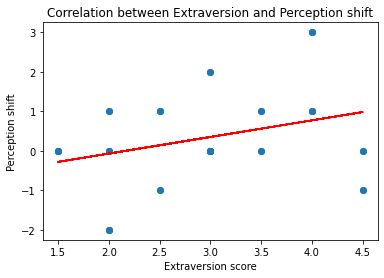

<Figure size 432x288 with 0 Axes>

In [41]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# create a scatter plot for the correlation between E and shift_q1

x = filtered_data['E']
y = filtered_data['shift_q1']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.scatter(x, y)
plt.plot(x, line, color='red')
plt.title('Correlation between Extraversion and Perception shift')
plt.xlabel('Extraversion score')
plt.ylabel('Perception shift')
    
plt.show()
plt.savefig('extra_q1.png')


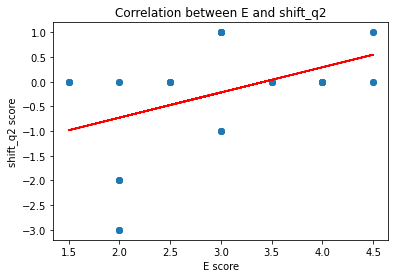

In [33]:
x = filtered_data['E']
y = filtered_data['shift_q2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.scatter(x, y)
plt.plot(x, line, color='red')
plt.title('Correlation between E and shift_q2')
plt.xlabel('E score')
plt.ylabel('shift_q2 score')
plt.show()

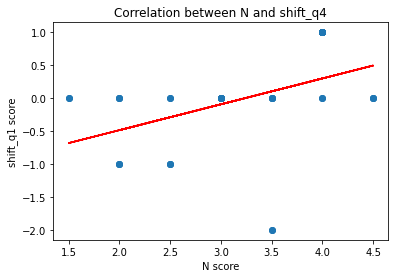

In [35]:
x = filtered_data['N']
y = filtered_data['shift_q4']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.scatter(x, y)
plt.plot(x, line, color='red')
plt.title('Correlation between N and shift_q4')
plt.xlabel('N score')
plt.ylabel('Question 4 shift')
plt.show()

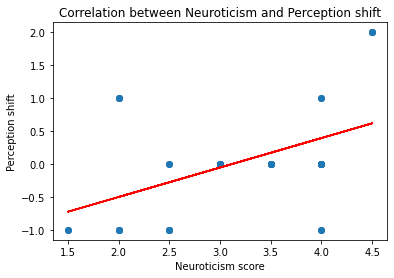

<Figure size 432x288 with 0 Axes>

In [40]:
x = filtered_data['N']
y = filtered_data['shift_q5']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.scatter(x, y)
plt.plot(x, line, color='red')
plt.title('Correlation between Neuroticism and Perception shift')
plt.xlabel('Neuroticism score')
plt.ylabel('Perception shift')
plt.show()
plt.savefig('neuroticism_q5.png')

In [ ]:
# These results represent the statistical significance of the difference in effectiveness of persuasion strategies between males and females for each of the six questions. The Welch's t-test is used to determine whether the mean shift in perception is significantly different between males and females, while the one-way ANOVA is used to determine whether the variance in shift in perception is significantly different between the two groups.

# The t-statistic is a measure of the difference between the mean shift in perception for males and females, relative to the standard error of the difference. The p-value is a measure of the probability of observing the difference, or a more extreme difference, if there were no real difference between males and females. In general, a smaller p-value indicates stronger evidence against the null hypothesis that there is no difference between males and females.

# The F-statistic is a measure of the ratio of the variance between the two groups to the variance within the groups. The p-value is a measure of the probability of observing the ratio, or a more extreme ratio, if there were no real difference between males and females. In general, a smaller p-value indicates stronger evidence against the null hypothesis that there is no difference between males and females.

# Based on the results you provided, it appears that there is no significant difference in effectiveness of persuasion strategies between males and females for Questions 2, 4, and 6, as the p-values are all greater than 0.05. For Questions 1, 3, and 5, the p-values are less than 0.05, indicating that there may be a significant difference in effectiveness between males and females for these questions. However, it's important to note that these results are based on the assumption of normality of the data and equal variances between the groups, so further analysis may be necessary to confirm the results.

In [ ]:
#thematic analysis
themes = {
    "Social proof": ["similar people", "tried and tested", "confidence", "depending on how many people", "positive experience"],
    "Bias in reviews": ["relate with the reviews", "biased", "overly positive reviews", "large quantity of good reviews"],
    "Personal preferences and preconceptions": ["pre-conceptions", "like to eat", "something that I already like", "real effects of research", "my own preconceptions"],
    "Health benefits and nutritional information": ["understand if the products are actually good and useful", "health benefits mentioned", "simple healthy recipes", "nutritional values", "well qualified professionals"],
    "Skepticism towards certain claims": ["smoothie detox", "juice is better", "influence your mood", "less convinced", "overly enthusiastic", "unrealistic", "promising too many results"],
    "Presentation and trustworthiness": ["presentation", "affect your own perspective", "trust their content", "eco-friendly", "fad diet", "cultural and historical backing"]
}